## Import Lib Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
loan_data_inputs_train= pd.read_csv('/users/lexi/desktop/loandata/loan_data_inputs_train.csv', index_col=0)
loan_data_targets_train= pd.read_csv('/users/lexi/desktop/loandata/loan_data_targets_train.csv', index_col=0,header= None)
loan_data_inputs_test= pd.read_csv('/users/lexi/desktop/loandata/loan_data_inputs_test.csv', index_col=0)
loan_data_targets_test= pd.read_csv('/users/lexi/desktop/loandata/loan_data_targets_test.csv', index_col=0, header= None)

In [3]:
pd.options.display.max_columns= None

In [4]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,Grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:edu_ren_smb,purpose:medical_house_other_wedding,purpose:moving_vacation_debtcons,purpose:majorpur_homeimp_car_credic,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-5,emp_length:6,emp_length:7-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d: <38,mths_since_issue_d: 38-39,mths_since_issue_d: 40-41,mths_since_issue_d: 42-48,mths_since_issue_d: 49-52,mths_since_issue_d: 53-64,mths_since_issue_d: 65-84,mths_since_issue_d: >85,int_rate_factor,int_rate: <9.548,int_rate: 9.548-12.025,int_rate: 12.025-15.74,int_rate: 15.74-20.281,int_rate: >20.

In [5]:
loan_data_targets_train.head()

,1
0,
427211,1
206088,1
136020,1
412305,0
36159,0


In [6]:
loan_data_inputs_train['addr_state:TX'].sum()

29158

In [7]:
loan_data_inputs_train.shape

(373028, 325)

In [8]:
loan_data_inputs_test.shape

(93257, 325)

In [9]:
loan_data_targets_train.shape

(373028, 1)

In [10]:
loan_data_targets_test.shape

(93257, 1)

## Feature Selection

In [11]:
inputs_train_with_ref= loan_data_inputs_train.loc[:,['Grade:A',
'Grade:B',
'Grade:C',
'Grade:D',
'Grade:E',
'Grade:F',
'Grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:edu_ren_smb',
'purpose:medical_house_other_wedding',
'purpose:moving_vacation_debtcons',
'purpose:majorpur_homeimp_car_credic',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-5',
'emp_length:6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d: <38',
'mths_since_issue_d: 38-39',
'mths_since_issue_d: 40-41',
'mths_since_issue_d: 42-48',
'mths_since_issue_d: 49-52',
'mths_since_issue_d: 53-64',
'mths_since_issue_d: 65-84',
'mths_since_issue_d: >85',
'int_rate: <9.548',
'int_rate: 9.548-12.025',
'int_rate: 12.025-15.74',
'int_rate: 15.74-20.281',
'int_rate: >20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [12]:
ref_cat=['Grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:edu_ren_smb',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d: >85',
'int_rate: >20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [13]:
inputs_train = inputs_train_with_ref.drop(ref_cat, axis = 1)
inputs_train.head()

,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:medical_house_other_wedding,purpose:moving_vacation_debtcons,purpose:majorpur_homeimp_car_credic,initial_list_status:w,term:36,emp_length:1,emp_length:2-5,emp_length:6,emp_length:7-9,emp_length:10,mths_since_issue_d: <38,mths_since_issue_d: 38-39,mths_since_issue_d: 40-41,mths_since_issue_d: 42-48,mths_since_issue_d: 49-52,mths_since_issue_d: 53-64,mths_since_issue_d: 65-84,int_rate: <9.548,int_rate: 9.548-12.025,int_rate: 12.025-15.74,int_rate: 15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub_rec:3-4,pub_rec:>=5,total_acc:28-51,total_acc:>=52,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [14]:
inputs_train.shape

(373028, 103)

In [15]:
inputs_train.columns.values

array(['Grade:A', 'Grade:B', 'Grade:C', 'Grade:D', 'Grade:E', 'Grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:NM_VA', 'addr_state:NY',
       'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'purpose:medical_house_other_wedding',
       'purpose:moving_vacation_debtcons',
       'purpose:majorpur_homeimp_car_credic', 'initial_list_status:w',
       'term:36', 'emp_length:1', 'emp_length:2-5', 'emp_length:6',
       'emp_length:7-9', 'emp_length:10', 'mths_since_issue_d: <38',
       'mths_since_issue_d: 38-39', 'mths_since_issue_d: 40-41',
       'mths_since_issue_d: 42-48', 'mths_since_issue_d: 49-52',

# PD Model Estimation

## _Logistic Regression_

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model
import scipy.stats as stat

In [17]:
reg= LogisticRegression()

In [18]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/lexi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lexi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
reg.intercept_

array([-1.91182773])

In [20]:

reg.coef_

array([[ 1.10532039,  0.92459204,  0.72805177,  0.52967843,  0.32861999,
         0.13371791,  0.09795308,  0.11217063,  0.02880497,  0.05084007,
         0.06642252,  0.06006634,  0.07714399,  0.13678813,  0.09810056,
         0.18533409,  0.24411097,  0.22782807,  0.25994071,  0.32637019,
         0.51719388,  0.08395155,  0.0158655 ,  0.49520169,  0.48107653,
         0.57191068,  0.11573732,  0.08753076,  0.09483999,  0.11586148,
         0.07537521,  0.06814548,  0.13300356,  0.59750647,  0.42404759,
         0.34114916,  0.11767876, -0.03134208, -0.27083085, -0.45955708,
         0.85665132,  0.4730372 ,  0.23723036,  0.07236289,  0.02964471,
        -0.00389415,  0.0236864 ,  0.06335346,  0.07089746,  0.0362708 ,
         0.01153532,  0.92998464,  0.77726283,  0.54617142,  0.30455478,
         0.23256981,  0.19888293,  0.18093678,  0.18387829,  0.21979119,
         0.13221168,  0.13838443,  0.17151724, -0.02031713,  0.02404899,
         0.25381993,  0.08641753,  0.09017738,  0.1

In [21]:
features=inputs_train.columns.values

In [22]:
summary = pd.DataFrame(columns=['Features'],data=features)
summary['Coef']=np.transpose(reg.coef_)
summary.index=summary.index+1
summary.loc[0]=['interept', reg.intercept_[0]]
summary = summary.sort_index()
summary

,Features,Coef
0,interept,-1.911828
1,Grade:A,1.105320
2,Grade:B,0.924592
3,Grade:C,0.728052
4,Grade:D,0.529678
5,Grade:E,0.328620
6,Grade:F,0.133718
7,home_ownership:OWN,0.097953
8,home_ownership:MORTGAGE,0.112171
9,addr_state:NM_VA,0.028805


## _Logistic Reg with P Values_

In [23]:
class LogisticReg_WithP:
    """
    Wrapper Class for Logistic Regression which has the usual sklearn instance 
    in an attribute self.model, and pvalues, z scores and estimated 
    errors for each coefficient in 
    
    self.z_scores
    self.p_values
    self.sigma_estimates
    
    as well as the negative hessian of the log Likelihood (Fisher information)
    
    self.F_ij
    """
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [24]:
reg2 = LogisticReg_WithP()

In [25]:
reg2.fit(inputs_train, loan_data_targets_train)

/Users/lexi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lexi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
summary= pd.DataFrame(columns=['Features'],data=features)
summary['Coef']=np.transpose(reg2.coef_)
summary.index=summary.index+1
summary.loc[0]=['intercept', reg2.intercept_[0]]
summary = summary.sort_index()
summary

,Features,Coef
0,intercept,-1.911828
1,Grade:A,1.105320
2,Grade:B,0.924592
3,Grade:C,0.728052
4,Grade:D,0.529678
5,Grade:E,0.328620
6,Grade:F,0.133718
7,home_ownership:OWN,0.097953
8,home_ownership:MORTGAGE,0.112171
9,addr_state:NM_VA,0.028805


In [27]:
p_values= np.append(np.nan, np.array(reg2.p_values))
p_values

array([            nan, 3.67184931e-034, 7.99953597e-053, 2.64126246e-038,
       5.42289618e-023, 8.88173721e-012, 7.70810310e-003, 1.12295631e-006,
       5.83114240e-019, 3.68747647e-001, 3.62223711e-002, 4.18643641e-003,
       4.66190155e-003, 1.98088363e-003, 1.35132939e-009, 1.01831046e-003,
       3.89474534e-012, 2.86158493e-007, 1.95004104e-018, 6.11787404e-019,
       3.80679740e-026, 2.46384138e-022, 1.02556557e-008, 2.36698425e-001,
       6.80440193e-040, 2.48435684e-046, 2.44048666e-061, 9.93437607e-020,
       6.29887113e-010, 2.57393546e-004, 1.49789635e-010, 5.08668919e-003,
       1.04878078e-003, 5.22791339e-013, 1.06260337e-092, 1.86478763e-058,
       6.97875095e-025, 1.37834838e-011, 1.52393287e-001, 2.47752473e-054,
       1.38090877e-113, 1.42654059e-029, 1.81500039e-027, 3.88583476e-011,
       1.16692628e-002, 2.34329312e-001, 8.47535379e-001, 3.70487142e-001,
       7.57703467e-003, 8.39382238e-003, 5.22484981e-001, 8.28885120e-001,
       4.34593241e-016, 1

In [28]:
pd.options.display.max_rows= None
pd.set_option('display.float_format', lambda x : '%.5f' %x)

In [29]:
summary['P_Values']= p_values
summary

,Features,Coef,P_Values
0,intercept,-1.91183,nan
1,Grade:A,1.10532,0.00000
2,Grade:B,0.92459,0.00000
3,Grade:C,0.72805,0.00000
4,Grade:D,0.52968,0.00000
5,Grade:E,0.32862,0.00000
6,Grade:F,0.13372,0.00771
7,home_ownership:OWN,0.09795,0.00000
8,home_ownership:MORTGAGE,0.11217,0.00000
9,addr_state:NM_VA,0.02880,0.36875


### _Select Features with P-Value smaller than 0.05, and drop those categories_
delinq_2yrs:0
delinq_2yrs:1-3
open_acc:1-3
open_acc:4-12
open_acc:13-17
open_acc:18-22
open_acc:23-25
open_acc:26-30
open_acc:>=31
pub_rec:3-4
pub_rec:>=5
total_acc:28-51
total_acc:>=52'''


In [30]:
inputs_train=inputs_train.loc[:,['Grade:A', 'Grade:B', 'Grade:C', 'Grade:D', 'Grade:E', 'Grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:NM_VA', 'addr_state:NY',
       'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'purpose:medical_house_other_wedding',
       'purpose:moving_vacation_debtcons',
       'purpose:majorpur_homeimp_car_credic', 'initial_list_status:w',
       'term:36', 'emp_length:1', 'emp_length:2-5', 'emp_length:6',
       'emp_length:7-9', 'emp_length:10', 'mths_since_issue_d: <38',
       'mths_since_issue_d: 38-39', 'mths_since_issue_d: 40-41',
       'mths_since_issue_d: 42-48', 'mths_since_issue_d: 49-52',
       'mths_since_issue_d: 53-64', 'mths_since_issue_d: 65-84',
       'int_rate: <9.548', 'int_rate: 9.548-12.025',
       'int_rate: 12.025-15.74', 'int_rate: 15.74-20.281',
       'mths_since_earliest_cr_line:141-164',
       'mths_since_earliest_cr_line:165-247',
       'mths_since_earliest_cr_line:248-270',
       'mths_since_earliest_cr_line:271-352',
       'mths_since_earliest_cr_line:>352', 
       'inq_last_6mths:0', 'inq_last_6mths:1-2',
       'inq_last_6mths:3-6', 'acc_now_delinq:>=1',
       'total_rev_hi_lim:5K-10K', 'total_rev_hi_lim:10K-20K',
       'total_rev_hi_lim:20K-30K', 'total_rev_hi_lim:30K-40K',
       'total_rev_hi_lim:40K-55K', 'total_rev_hi_lim:55K-95K',
       'total_rev_hi_lim:>95K', 'annual_inc:20K-30K',
       'annual_inc:30K-40K', 'annual_inc:40K-50K', 'annual_inc:50K-60K',
       'annual_inc:60K-70K', 'annual_inc:70K-80K', 'annual_inc:80K-90K',
       'annual_inc:90K-100K', 'annual_inc:100K-120K',
       'annual_inc:120K-140K', 'annual_inc:>140K', 'dti:<=1.4',
       'dti:1.4-3.5', 'dti:3.5-7.7', 'dti:7.7-10.5', 'dti:10.5-16.1',
       'dti:16.1-20.3', 'dti:20.3-21.7', 'dti:21.7-22.4', 'dti:22.4-35',
       'mths_since_last_delinq:Missing', 'mths_since_last_delinq:4-30',
       'mths_since_last_delinq:31-56', 'mths_since_last_delinq:>=57',
       'mths_since_last_record:Missing', 'mths_since_last_record:3-20',
       'mths_since_last_record:21-31', 'mths_since_last_record:32-80',
       'mths_since_last_record:81-86', 'mths_since_last_record:>=86']]

In [31]:
inputs_train_with_ref = inputs_train_with_ref.loc[:, ['Grade:A',
'Grade:B',
'Grade:C',
'Grade:D',
'Grade:E',
'Grade:F',
'Grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:edu_ren_smb',
'purpose:medical_house_other_wedding',
'purpose:moving_vacation_debtcons',
'purpose:majorpur_homeimp_car_credic',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-5',
'emp_length:6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d: <38',
'mths_since_issue_d: 38-39',
'mths_since_issue_d: 40-41',
'mths_since_issue_d: 42-48',
'mths_since_issue_d: 49-52',
'mths_since_issue_d: 53-64',
'mths_since_issue_d: 65-84',
'mths_since_issue_d: >85',
'int_rate: <9.548',
'int_rate: 9.548-12.025',
'int_rate: 12.025-15.74',
'int_rate: 15.74-20.281',
'int_rate: >20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [32]:
ref_cat=['Grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:edu_ren_smb',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d: >85',
'int_rate: >20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [33]:
reg2.fit(inputs_train, loan_data_targets_train)

/Users/lexi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lexi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
reg2.coef_

array([[ 1.10106947,  0.92225551,  0.7261598 ,  0.52833237,  0.32882287,
         0.13478289,  0.09788204,  0.10986041,  0.02956227,  0.04841452,
         0.06656462,  0.06100024,  0.07671755,  0.1361657 ,  0.09796067,
         0.18670054,  0.24433666,  0.22766632,  0.25836579,  0.32703266,
         0.51859816,  0.08229918,  0.01598533,  0.49368302,  0.47816051,
         0.56963568,  0.11582568,  0.08707151,  0.09340916,  0.11556309,
         0.07553791,  0.06870499,  0.13425428,  0.59832887,  0.42398654,
         0.34135602,  0.11817473, -0.03007902, -0.26881288, -0.4610108 ,
         0.85891127,  0.47509974,  0.2391349 ,  0.07397771,  0.02890985,
        -0.00602841,  0.02089565,  0.06074506,  0.06695504,  0.94344874,
         0.78695583,  0.55362135,  0.24764659,  0.0822131 ,  0.08195349,
         0.10129744,  0.12700202,  0.15199945,  0.18425815,  0.34303531,
        -0.07548496, -0.009988  ,  0.08232904,  0.14565471,  0.21981605,
         0.29086051,  0.36461383,  0.38325067,  0.4

In [35]:
features= inputs_train.columns.values
features

array(['Grade:A', 'Grade:B', 'Grade:C', 'Grade:D', 'Grade:E', 'Grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:NM_VA', 'addr_state:NY',
       'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'purpose:medical_house_other_wedding',
       'purpose:moving_vacation_debtcons',
       'purpose:majorpur_homeimp_car_credic', 'initial_list_status:w',
       'term:36', 'emp_length:1', 'emp_length:2-5', 'emp_length:6',
       'emp_length:7-9', 'emp_length:10', 'mths_since_issue_d: <38',
       'mths_since_issue_d: 38-39', 'mths_since_issue_d: 40-41',
       'mths_since_issue_d: 42-48', 'mths_since_issue_d: 49-52',

In [36]:
summary= pd.DataFrame(columns=['Features'],data=features)
summary['Coef']=np.transpose(reg2.coef_)
summary.index=summary.index+1
summary.loc[0]=['intercept', reg2.intercept_[0]]
summary = summary.sort_index()
summary['P_Values']=np.append(np.nan, np.array(reg2.p_values))
summary

,Features,Coef,P_Values
0,intercept,-1.66397,nan
1,Grade:A,1.10107,0.00000
2,Grade:B,0.92226,0.00000
3,Grade:C,0.72616,0.00000
4,Grade:D,0.52833,0.00000
5,Grade:E,0.32882,0.00000
6,Grade:F,0.13478,0.00602
7,home_ownership:OWN,0.09788,0.00000
8,home_ownership:MORTGAGE,0.10986,0.00000
9,addr_state:NM_VA,0.02956,0.35567


In [37]:
import pickle

In [38]:
pickle.dump(reg2,open('pd_model.sav','wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

## Model Validation

### _Out of Sample Validation(Test)_

In [39]:
inputs_test_with_ref = loan_data_inputs_test

In [40]:
inputs_test_with_ref = inputs_test_with_ref.loc[:, ['Grade:A',
'Grade:B',
'Grade:C',
'Grade:D',
'Grade:E',
'Grade:F',
'Grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:edu_ren_smb',
'purpose:medical_house_other_wedding',
'purpose:moving_vacation_debtcons',
'purpose:majorpur_homeimp_car_credic',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-5',
'emp_length:6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d: <38',
'mths_since_issue_d: 38-39',
'mths_since_issue_d: 40-41',
'mths_since_issue_d: 42-48',
'mths_since_issue_d: 49-52',
'mths_since_issue_d: 53-64',
'mths_since_issue_d: 65-84',
'mths_since_issue_d: >85',
'int_rate: <9.548',
'int_rate: 9.548-12.025',
'int_rate: 12.025-15.74',
'int_rate: 15.74-20.281',
'int_rate: >20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [41]:
inputs_test= loan_data_inputs_test.loc[:,['Grade:A', 'Grade:B', 'Grade:C', 'Grade:D', 'Grade:E', 'Grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:NM_VA', 'addr_state:NY',
       'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'purpose:medical_house_other_wedding',
       'purpose:moving_vacation_debtcons',
       'purpose:majorpur_homeimp_car_credic', 'initial_list_status:w',
       'term:36', 'emp_length:1', 'emp_length:2-5', 'emp_length:6',
       'emp_length:7-9', 'emp_length:10', 'mths_since_issue_d: <38',
       'mths_since_issue_d: 38-39', 'mths_since_issue_d: 40-41',
       'mths_since_issue_d: 42-48', 'mths_since_issue_d: 49-52',
       'mths_since_issue_d: 53-64', 'mths_since_issue_d: 65-84',
       'int_rate: <9.548', 'int_rate: 9.548-12.025',
       'int_rate: 12.025-15.74', 'int_rate: 15.74-20.281',
       'mths_since_earliest_cr_line:141-164',
       'mths_since_earliest_cr_line:165-247',
       'mths_since_earliest_cr_line:248-270',
       'mths_since_earliest_cr_line:271-352',
       'mths_since_earliest_cr_line:>352', 
       'inq_last_6mths:0', 'inq_last_6mths:1-2',
       'inq_last_6mths:3-6', 'acc_now_delinq:>=1',
       'total_rev_hi_lim:5K-10K', 'total_rev_hi_lim:10K-20K',
       'total_rev_hi_lim:20K-30K', 'total_rev_hi_lim:30K-40K',
       'total_rev_hi_lim:40K-55K', 'total_rev_hi_lim:55K-95K',
       'total_rev_hi_lim:>95K', 'annual_inc:20K-30K',
       'annual_inc:30K-40K', 'annual_inc:40K-50K', 'annual_inc:50K-60K',
       'annual_inc:60K-70K', 'annual_inc:70K-80K', 'annual_inc:80K-90K',
       'annual_inc:90K-100K', 'annual_inc:100K-120K',
       'annual_inc:120K-140K', 'annual_inc:>140K', 'dti:<=1.4',
       'dti:1.4-3.5', 'dti:3.5-7.7', 'dti:7.7-10.5', 'dti:10.5-16.1',
       'dti:16.1-20.3', 'dti:20.3-21.7', 'dti:21.7-22.4', 'dti:22.4-35',
       'mths_since_last_delinq:Missing', 'mths_since_last_delinq:4-30',
       'mths_since_last_delinq:31-56', 'mths_since_last_delinq:>=57',
       'mths_since_last_record:Missing', 'mths_since_last_record:3-20',
       'mths_since_last_record:21-31', 'mths_since_last_record:32-80',
       'mths_since_last_record:81-86', 'mths_since_last_record:>=86']]

In [42]:
inputs_test.shape

(93257, 90)

In [43]:
inputs_train.shape

(373028, 90)

In [44]:
y_hat_test= reg2.model.predict(inputs_test)
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
y_hat_test_prob=reg2.model.predict_proba(inputs_test)
y_hat_test_prob

array([[0.1043755 , 0.8956245 ],
       [0.1484385 , 0.8515615 ],
       [0.11337166, 0.88662834],
       ...,
       [0.02644543, 0.97355457],
       [0.04278242, 0.95721758],
       [0.05193495, 0.94806505]])

In [46]:
# In other words, we take only the probabilities for being 1.
y_hat_test_prob = y_hat_test_prob[:][:,1]

In [47]:
pd.options.display.max_rows=100

In [48]:
targets_test_temp =loan_data_targets_test
targets_test_temp.reset_index(drop=True, inplace=True)
targets_test_temp

,1
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,0


In [49]:
df_actual_predicted_prob = pd.concat([targets_test_temp, pd.DataFrame(y_hat_test_prob)], axis=1)
df_actual_predicted_prob.columns=['targets_test','y_hat_test_prob']
df_actual_predicted_prob.head()

,targets_test,y_hat_test_prob
0,1,0.89562
1,1,0.85156
2,1,0.88663
3,1,0.94189
4,1,0.96683


In [50]:
df_actual_predicted_prob.index = loan_data_inputs_test.index

In [51]:
df_actual_predicted_prob.head()

,targets_test,y_hat_test_prob
362514,1,0.89562
288564,1,0.85156
213591,1,0.88663
263083,1,0.94189
165001,1,0.96683


## _Model Performance_

In [52]:
#tr=0.5
tr=0.7
df_actual_predicted_prob['y_hat_test'] = np.where(df_actual_predicted_prob['y_hat_test_prob']>tr,1,0)
df_actual_predicted_prob.head()

,targets_test,y_hat_test_prob,y_hat_test
362514,1,0.89562,1
288564,1,0.85156,1
213591,1,0.88663,1
263083,1,0.94189,1
165001,1,0.96683,1


### _Confusion Matrix_

#### OBS

In [53]:
pd.crosstab(df_actual_predicted_prob['targets_test'],
            df_actual_predicted_prob['y_hat_test'], 
            rownames=['Actual'], 
            colnames=['Predicted'])

Predicted,0,1
Actual,,
0,608,9582
1,1049,82018


#### Prob

In [54]:
pd.crosstab(df_actual_predicted_prob['targets_test'],
            df_actual_predicted_prob['y_hat_test'], 
            rownames=['Actual'], 
            colnames=['Predicted'])/ df_actual_predicted_prob.shape[0]

Predicted,0,1
Actual,,
0,0.00652,0.10275
1,0.01125,0.87948


In [55]:
(pd.crosstab(df_actual_predicted_prob['targets_test'],
             df_actual_predicted_prob['y_hat_test'],
             rownames = ['Actual'], 
             colnames = ['Predicted']) / df_actual_predicted_prob.shape[0]).iloc[0, 0] 
+ (pd.crosstab(df_actual_predicted_prob['targets_test'], 
               df_actual_predicted_prob['y_hat_test'], 
               rownames = ['Actual'], 
               colnames = ['Predicted']) / df_actual_predicted_prob.shape[0]).iloc[1, 1]


0.8794835776402844

In [56]:
(pd.crosstab(df_actual_predicted_prob['targets_test'],
             df_actual_predicted_prob['y_hat_test'],
             rownames = ['Actual'], 
             colnames = ['Predicted']) / df_actual_predicted_prob.shape[0])

Predicted,0,1
Actual,,
0,0.00652,0.10275
1,0.01125,0.87948


In [57]:
(pd.crosstab(df_actual_predicted_prob['targets_test'], 
               df_actual_predicted_prob['y_hat_test'], 
               rownames = ['Actual'], 
               colnames = ['Predicted']) / df_actual_predicted_prob.shape[0])

Predicted,0,1
Actual,,
0,0.00652,0.10275
1,0.01125,0.87948


### _Calculate ROC AUC_

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

In [59]:
roc_curve(df_actual_predicted_prob['targets_test'], 
          df_actual_predicted_prob['y_hat_test_prob'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 7.22308498e-05, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99296492, 0.99296492, 0.99170648, ..., 0.4363718 , 0.42564753,
        0.32733371]))

In [60]:
#fpr: Cumulative False Positive Rate
#tpr: Cumulative True Positive Rate

fpr, tpr, thresholds = roc_curve(df_actual_predicted_prob['targets_test'], 
                                 df_actual_predicted_prob['y_hat_test_prob'])


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### __ROC__

Text(0.5, 1.0, 'ROC Curve')

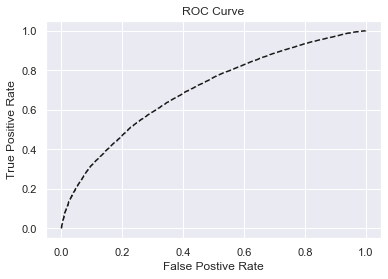

In [62]:
plt.plot(fpr, tpr, linestyle = '--', color = 'k')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

#### __AUROC__

In [63]:
auroc= roc_auc_score(df_actual_predicted_prob['targets_test'], 
                                 df_actual_predicted_prob['y_hat_test_prob'])
auroc

0.6999006288277906

## _Gini and Kolmogorov-Smirnov_

Sort values by y_hat_test_prob

In [64]:
df_actual_predicted_prob= df_actual_predicted_prob.sort_values('y_hat_test_prob')

In [65]:
df_actual_predicted_prob.head()

,targets_test,y_hat_test_prob,y_hat_test
42344,1,0.32733,0
42341,1,0.37598,0
11208,0,0.42565,0
42404,1,0.43637,0
17237,0,0.43975,0


In [66]:
df_actual_predicted_prob.tail()

,targets_test,y_hat_test_prob,y_hat_test
234919,1,0.99180,1
239228,1,0.99209,1
251398,1,0.99225,1
262480,1,0.99276,1
242624,1,0.99296,1


In [67]:
df_actual_predicted_prob = df_actual_predicted_prob.reset_index()

In [68]:
df_actual_predicted_prob.head()

,index,targets_test,y_hat_test_prob,y_hat_test
0,42344,1,0.32733,0
1,42341,1,0.37598,0
2,11208,0,0.42565,0
3,42404,1,0.43637,0
4,17237,0,0.43975,0


Calculate Cumulative numbers of observations(total good bad)

In [69]:
df_actual_predicted_prob['Cumulative N Population']= df_actual_predicted_prob.index + 1

In [70]:
df_actual_predicted_prob.head()

,index,targets_test,y_hat_test_prob,y_hat_test,Cumulative N Population
0,42344,1,0.32733,0,1
1,42341,1,0.37598,0,2
2,11208,0,0.42565,0,3
3,42404,1,0.43637,0,4
4,17237,0,0.43975,0,5


In [71]:
df_actual_predicted_prob['Cumulative N Good']=df_actual_predicted_prob['targets_test'].cumsum()

In [72]:
df_actual_predicted_prob['Cumulative N Bad']= df_actual_predicted_prob['Cumulative N Population'] - df_actual_predicted_prob['Cumulative N Good']

In [73]:
df_actual_predicted_prob.head()

,index,targets_test,y_hat_test_prob,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42344,1,0.32733,0,1,1,0
1,42341,1,0.37598,0,2,2,0
2,11208,0,0.42565,0,3,2,1
3,42404,1,0.43637,0,4,3,1
4,17237,0,0.43975,0,5,3,2


In [74]:
df_actual_predicted_prob['Cumulative Perc Population']=df_actual_predicted_prob['Cumulative N Population']/ df_actual_predicted_prob.shape[0]
df_actual_predicted_prob['Cumulative Perc Good']=df_actual_predicted_prob['Cumulative N Good']/ df_actual_predicted_prob['targets_test'].sum()
df_actual_predicted_prob['Cumulative Perc Bad']=df_actual_predicted_prob['Cumulative N Bad']/( df_actual_predicted_prob.shape[0] - df_actual_predicted_prob['targets_test'].sum())


In [75]:
df_actual_predicted_prob.head()

,index,targets_test,y_hat_test_prob,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42344,1,0.32733,0,1,1,0,0.00001,0.00001,0.00000
1,42341,1,0.37598,0,2,2,0,0.00002,0.00002,0.00000
2,11208,0,0.42565,0,3,2,1,0.00003,0.00002,0.00010
3,42404,1,0.43637,0,4,3,1,0.00004,0.00004,0.00010
4,17237,0,0.43975,0,5,3,2,0.00005,0.00004,0.00020


##### Gini Plot

Text(0.5, 1.0, 'Gini')

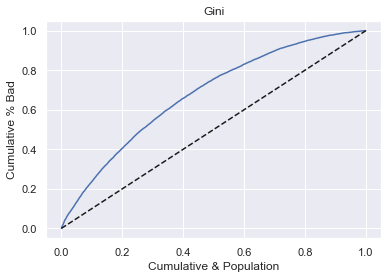

In [76]:
plt.plot(df_actual_predicted_prob['Cumulative Perc Population'],
        df_actual_predicted_prob['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_prob['Cumulative Perc Population'],
        df_actual_predicted_prob['Cumulative Perc Population'], 
         linestyle = '--',
        color='k')

plt.xlabel('Cumulative & Population')

plt.ylabel('Cumulative % Bad')

plt.title('Gini')

In [77]:
Gini = auroc*2 - 1
Gini

0.39980125765558117

#### K-S Plot

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

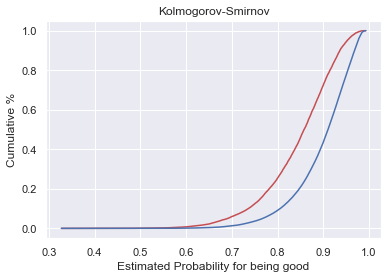

In [78]:
plt.plot(df_actual_predicted_prob['y_hat_test_prob']
        ,df_actual_predicted_prob['Cumulative Perc Bad']
        ,color = 'r')

plt.plot(df_actual_predicted_prob['y_hat_test_prob']
        ,df_actual_predicted_prob['Cumulative Perc Good']
        ,color = 'b')

plt.xlabel('Estimated Probability for being good')

plt.ylabel('Cumulative %')

plt.title('Kolmogorov-Smirnov')


In [79]:
pd.set_option('display.float_format', lambda x : '%.5f' %x)

In [80]:
KS= max(df_actual_predicted_prob['Cumulative Perc Bad'] - df_actual_predicted_prob['Cumulative Perc Good'])

In [81]:
format(KS, '.5f')

'0.29101'

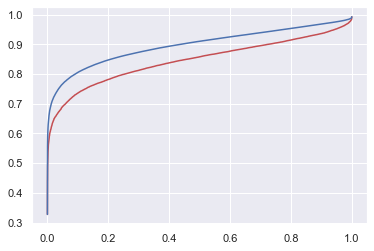

In [82]:
plt.plot(df_actual_predicted_prob['Cumulative Perc Bad']
         ,df_actual_predicted_prob['y_hat_test_prob']
        ,color = 'r')

plt.plot(df_actual_predicted_prob['Cumulative Perc Good']
         ,df_actual_predicted_prob['y_hat_test_prob']
        ,color = 'b')

# Implementation of PD model

In [83]:
inputs_train_with_ref = inputs_train_with_ref.loc[:, ['Grade:A',
'Grade:B',
'Grade:C',
'Grade:D',
'Grade:E',
'Grade:F',
'Grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:edu_ren_smb',
'purpose:medical_house_other_wedding',
'purpose:moving_vacation_debtcons',
'purpose:majorpur_homeimp_car_credic',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-5',
'emp_length:6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d: <38',
'mths_since_issue_d: 38-39',
'mths_since_issue_d: 40-41',
'mths_since_issue_d: 42-48',
'mths_since_issue_d: 49-52',
'mths_since_issue_d: 53-64',
'mths_since_issue_d: 65-84',
'mths_since_issue_d: >85',
'int_rate: <9.548',
'int_rate: 9.548-12.025',
'int_rate: 12.025-15.74',
'int_rate: 15.74-20.281',
'int_rate: >20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [84]:
inputs_test_with_ref.head()

,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,Grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:edu_ren_smb,purpose:medical_house_other_wedding,purpose:moving_vacation_debtcons,purpose:majorpur_homeimp_car_credic,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-5,emp_length:6,emp_length:7-9,emp_length:10,mths_since_issue_d: <38,mths_since_issue_d: 38-39,mths_since_issue_d: 40-41,mths_since_issue_d: 42-48,mths_since_issue_d: 49-52,mths_since_issue_d: 53-64,mths_since_issue_d: 65-84,mths_since_issue_d: >85,int_rate: <9.548,int_rate: 9.548-12.025,int_rate: 12.025-15.74,int_rate: 15.74-20.281,int_rate: >20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [85]:
summary

,Features,Coef,P_Values
0,intercept,-1.66397,nan
1,Grade:A,1.10107,0.00000
2,Grade:B,0.92226,0.00000
3,Grade:C,0.72616,0.00000
4,Grade:D,0.52833,0.00000
5,Grade:E,0.32882,0.00000
6,Grade:F,0.13478,0.00602
7,home_ownership:OWN,0.09788,0.00000
8,home_ownership:MORTGAGE,0.10986,0.00000
9,addr_state:NM_VA,0.02956,0.35567


In [86]:
y_hat_test_prob

array([0.8956245 , 0.8515615 , 0.88662834, ..., 0.97355457, 0.95721758,
       0.94806505])

In [87]:
ref_cat

['Grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:edu_ren_smb',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d: >85',
 'int_rate: >20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'total_rev_hi_lim:<=5K',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

## _Creating Scorecard_

In [88]:
df_ref_cat = pd.DataFrame(ref_cat, columns= ['Features'])

df_ref_cat['Coef'] = 0

df_ref_cat['P_Values'] = np.nan

df_ref_cat

,Features,Coef,P_Values
0,Grade:G,0,nan
1,home_ownership:RENT_OTHER_NONE_ANY,0,nan
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,nan
3,verification_status:Verified,0,nan
4,purpose:edu_ren_smb,0,nan
5,initial_list_status:f,0,nan
6,term:60,0,nan
7,emp_length:0,0,nan
8,mths_since_issue_d: >85,0,nan
9,int_rate: >20.281,0,nan


In [89]:
df_scorecard = pd.concat([summary, df_ref_cat])

df_scorecard = df_scorecard.reset_index()

df_scorecard

,index,Features,Coef,P_Values
0,0,intercept,-1.66397,nan
1,1,Grade:A,1.10107,0.00000
2,2,Grade:B,0.92226,0.00000
3,3,Grade:C,0.72616,0.00000
4,4,Grade:D,0.52833,0.00000
5,5,Grade:E,0.32882,0.00000
6,6,Grade:F,0.13478,0.00602
7,7,home_ownership:OWN,0.09788,0.00000
8,8,home_ownership:MORTGAGE,0.10986,0.00000
9,9,addr_state:NM_VA,0.02956,0.35567


In [90]:
df_scorecard['Original Features'] = df_scorecard['Features'].str.split(':').str[0]

df_scorecard

,index,Features,Coef,P_Values,Original Features
0,0,intercept,-1.66397,nan,intercept
1,1,Grade:A,1.10107,0.00000,Grade
2,2,Grade:B,0.92226,0.00000,Grade
3,3,Grade:C,0.72616,0.00000,Grade
4,4,Grade:D,0.52833,0.00000,Grade
5,5,Grade:E,0.32882,0.00000,Grade
6,6,Grade:F,0.13478,0.00602,Grade
7,7,home_ownership:OWN,0.09788,0.00000,home_ownership
8,8,home_ownership:MORTGAGE,0.10986,0.00000,home_ownership
9,9,addr_state:NM_VA,0.02956,0.35567,addr_state


In [91]:
min_score = 300
max_score = 850 

In [92]:
df_scorecard.groupby('Original Features')['Coef'].min()

Original Features
Grade                          0.00000
acc_now_delinq                 0.00000
addr_state                     0.00000
annual_inc                    -0.07548
dti                            0.00000
emp_length                     0.00000
home_ownership                 0.00000
initial_list_status            0.00000
inq_last_6mths                 0.00000
int_rate                       0.00000
intercept                     -1.66397
mths_since_earliest_cr_line   -0.00603
mths_since_issue_d            -0.46101
mths_since_last_delinq         0.00000
mths_since_last_record         0.00000
purpose                        0.00000
term                           0.00000
total_rev_hi_lim               0.00000
verification_status            0.00000
Name: Coef, dtype: float64

In [93]:
min_sum_coef = df_scorecard.groupby('Original Features')['Coef'].min().sum()

min_sum_coef

-2.2064928469470946

In [94]:
df_scorecard.groupby('Original Features')['Coef'].max()

Original Features
Grade                          1.10107
acc_now_delinq                 0.24765
addr_state                     0.51860
annual_inc                     0.54296
dti                            0.35486
emp_length                     0.13425
home_ownership                 0.10986
initial_list_status            0.11583
inq_last_6mths                 0.94345
int_rate                       0.85891
intercept                     -1.66397
mths_since_earliest_cr_line    0.06696
mths_since_issue_d             0.59833
mths_since_last_delinq         0.23798
mths_since_last_record         0.66037
purpose                        0.56964
term                           0.08707
total_rev_hi_lim               0.34304
verification_status            0.08230
Name: Coef, dtype: float64

In [95]:
max_sum_coef = df_scorecard.groupby('Original Features')['Coef'].max().sum()

max_sum_coef

5.909141662760535

In [96]:
df_scorecard['Score_Calculation'] = df_scorecard['Coef']*(max_score - min_score)/ (max_sum_coef - min_sum_coef)

df_scorecard

,index,Features,Coef,P_Values,Original Features,Score_Calculation
0,0,intercept,-1.66397,nan,intercept,-112.76786
1,1,Grade:A,1.10107,0.00000,Grade,74.61995
2,2,Grade:B,0.92226,0.00000,Grade,62.50165
3,3,Grade:C,0.72616,0.00000,Grade,49.21216
4,4,Grade:D,0.52833,0.00000,Grade,35.80531
5,5,Grade:E,0.32882,0.00000,Grade,22.28447
6,6,Grade:F,0.13478,0.00602,Grade,9.13429
7,7,home_ownership:OWN,0.09788,0.00000,home_ownership,6.63351
8,8,home_ownership:MORTGAGE,0.10986,0.00000,home_ownership,7.44529
9,9,addr_state:NM_VA,0.02956,0.35567,addr_state,2.00345


In [97]:
df_scorecard['Score_Calculation'][0]= ((df_scorecard['Coef'][0] - min_sum_coef)/ (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score

df_scorecard

/Users/lexi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,index,Features,Coef,P_Values,Original Features,Score_Calculation
0,0,intercept,-1.66397,nan,intercept,336.76709
1,1,Grade:A,1.10107,0.00000,Grade,74.61995
2,2,Grade:B,0.92226,0.00000,Grade,62.50165
3,3,Grade:C,0.72616,0.00000,Grade,49.21216
4,4,Grade:D,0.52833,0.00000,Grade,35.80531
5,5,Grade:E,0.32882,0.00000,Grade,22.28447
6,6,Grade:F,0.13478,0.00602,Grade,9.13429
7,7,home_ownership:OWN,0.09788,0.00000,home_ownership,6.63351
8,8,home_ownership:MORTGAGE,0.10986,0.00000,home_ownership,7.44529
9,9,addr_state:NM_VA,0.02956,0.35567,addr_state,2.00345


In [98]:
df_scorecard.columns = ('index','Features', 'Coef' , 'P_Values', 'Original Features', 'Score_Calculation')

In [99]:
df_scorecard['Score_Preliminary'] = df_scorecard['Score_Calculation'].round()

df_scorecard

,index,Features,Coef,P_Values,Original Features,Score_Calculation,Score_Preliminary
0,0,intercept,-1.66397,nan,intercept,336.76709,337.00000
1,1,Grade:A,1.10107,0.00000,Grade,74.61995,75.00000
2,2,Grade:B,0.92226,0.00000,Grade,62.50165,63.00000
3,3,Grade:C,0.72616,0.00000,Grade,49.21216,49.00000
4,4,Grade:D,0.52833,0.00000,Grade,35.80531,36.00000
5,5,Grade:E,0.32882,0.00000,Grade,22.28447,22.00000
6,6,Grade:F,0.13478,0.00602,Grade,9.13429,9.00000
7,7,home_ownership:OWN,0.09788,0.00000,home_ownership,6.63351,7.00000
8,8,home_ownership:MORTGAGE,0.10986,0.00000,home_ownership,7.44529,7.00000
9,9,addr_state:NM_VA,0.02956,0.35567,addr_state,2.00345,2.00000


In [100]:
min_sum_score_prel = df_scorecard.groupby('Original Features')['Score_Preliminary'].min().sum()
min_sum_score_prel

301.0

In [101]:
max_sum_score_prel = df_scorecard.groupby('Original Features')['Score_Preliminary'].max().sum()
max_sum_score_prel

852.0

In [102]:
pd.options.display.max_rows = None

In [103]:
df_scorecard['Diff'] = df_scorecard['Score_Preliminary'] - df_scorecard['Score_Calculation'] 

df_scorecard

,index,Features,Coef,P_Values,Original Features,Score_Calculation,Score_Preliminary,Diff
0,0,intercept,-1.66397,nan,intercept,336.76709,337.00000,0.23291
1,1,Grade:A,1.10107,0.00000,Grade,74.61995,75.00000,0.38005
2,2,Grade:B,0.92226,0.00000,Grade,62.50165,63.00000,0.49835
3,3,Grade:C,0.72616,0.00000,Grade,49.21216,49.00000,-0.21216
4,4,Grade:D,0.52833,0.00000,Grade,35.80531,36.00000,0.19469
5,5,Grade:E,0.32882,0.00000,Grade,22.28447,22.00000,-0.28447
6,6,Grade:F,0.13478,0.00602,Grade,9.13429,9.00000,-0.13429
7,7,home_ownership:OWN,0.09788,0.00000,home_ownership,6.63351,7.00000,0.36649
8,8,home_ownership:MORTGAGE,0.10986,0.00000,home_ownership,7.44529,7.00000,-0.44529
9,9,addr_state:NM_VA,0.02956,0.35567,addr_state,2.00345,2.00000,-0.00345


In [104]:

df_scorecard['Score_Preliminary'][22] = 5

df_scorecard['Score_Preliminary'][34] = 40

df_scorecard['Score_Preliminary'][46] = -1

/Users/lexi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/lexi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lexi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 

In [105]:
min_sum_score_prel = df_scorecard.groupby('Original Features')['Score_Preliminary'].min().sum()
min_sum_score_prel

300.0

In [106]:
max_sum_score_prel = df_scorecard.groupby('Original Features')['Score_Preliminary'].max().sum()
max_sum_score_prel

850.0

In [107]:
df_scorecard['Score'] = df_scorecard['Score_Preliminary']
df_scorecard['Score'] = df_scorecard.Score.astype(int)
df_scorecard

,index,Features,Coef,P_Values,Original Features,Score_Calculation,Score_Preliminary,Diff,Score
0,0,intercept,-1.66397,nan,intercept,336.76709,337.00000,0.23291,337
1,1,Grade:A,1.10107,0.00000,Grade,74.61995,75.00000,0.38005,75
2,2,Grade:B,0.92226,0.00000,Grade,62.50165,63.00000,0.49835,63
3,3,Grade:C,0.72616,0.00000,Grade,49.21216,49.00000,-0.21216,49
4,4,Grade:D,0.52833,0.00000,Grade,35.80531,36.00000,0.19469,36
5,5,Grade:E,0.32882,0.00000,Grade,22.28447,22.00000,-0.28447,22
6,6,Grade:F,0.13478,0.00602,Grade,9.13429,9.00000,-0.13429,9
7,7,home_ownership:OWN,0.09788,0.00000,home_ownership,6.63351,7.00000,0.36649,7
8,8,home_ownership:MORTGAGE,0.10986,0.00000,home_ownership,7.44529,7.00000,-0.44529,7
9,9,addr_state:NM_VA,0.02956,0.35567,addr_state,2.00345,2.00000,-0.00345,2


## _Calculating Credit Score_

In [108]:
inputs_test_with_ref_w_intercept = inputs_test_with_ref
inputs_test_with_ref_w_intercept.head()

,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,Grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:edu_ren_smb,purpose:medical_house_other_wedding,purpose:moving_vacation_debtcons,purpose:majorpur_homeimp_car_credic,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-5,emp_length:6,emp_length:7-9,emp_length:10,mths_since_issue_d: <38,mths_since_issue_d: 38-39,mths_since_issue_d: 40-41,mths_since_issue_d: 42-48,mths_since_issue_d: 49-52,mths_since_issue_d: 53-64,mths_since_issue_d: 65-84,mths_since_issue_d: >85,int_rate: <9.548,int_rate: 9.548-12.025,int_rate: 12.025-15.74,int_rate: 15.74-20.281,int_rate: >20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [109]:
inputs_test_with_ref_w_intercept.insert(0,'intercept',1)

inputs_test_with_ref_w_intercept.head()

,intercept,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,Grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:edu_ren_smb,purpose:medical_house_other_wedding,purpose:moving_vacation_debtcons,purpose:majorpur_homeimp_car_credic,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-5,emp_length:6,emp_length:7-9,emp_length:10,mths_since_issue_d: <38,mths_since_issue_d: 38-39,mths_since_issue_d: 40-41,mths_since_issue_d: 42-48,mths_since_issue_d: 49-52,mths_since_issue_d: 53-64,mths_since_issue_d: 65-84,mths_since_issue_d: >85,int_rate: <9.548,int_rate: 9.548-12.025,int_rate: 12.025-15.74,int_rate: 15.74-20.281,int_rate: >20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [110]:
inputs_test_with_ref_w_intercept = inputs_test_with_ref_w_intercept[df_scorecard['Features'].values]
inputs_test_with_ref_w_intercept.head()

,intercept,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:medical_house_other_wedding,purpose:moving_vacation_debtcons,purpose:majorpur_homeimp_car_credic,initial_list_status:w,term:36,emp_length:1,emp_length:2-5,emp_length:6,emp_length:7-9,emp_length:10,mths_since_issue_d: <38,mths_since_issue_d: 38-39,mths_since_issue_d: 40-41,mths_since_issue_d: 42-48,mths_since_issue_d: 49-52,mths_since_issue_d: 53-64,mths_since_issue_d: 65-84,int_rate: <9.548,int_rate: 9.548-12.025,int_rate: 12.025-15.74,int_rate: 15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86,Grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:edu_ren_smb,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d: >85,int_rate: >20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,total_rev_hi_lim:<=5K,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [111]:
scorecard_score = df_scorecard['Score']

In [112]:
inputs_test_with_ref_w_intercept.shape

(93257, 109)

In [113]:
scorecard_score.shape
scorecard_score

0      337
1       75
2       63
3       49
4       36
5       22
6        9
7        7
8        7
9        2
10       3
11       5
12       4
13       5
14       9
15       7
16      13
17      17
18      15
19      18
20      22
21      35
22       5
23       1
24      33
25      32
26      39
27       8
28       6
29       6
30       8
31       5
32       5
33       9
34      40
35      29
36      23
37       8
38      -2
39     -18
40     -31
41      58
42      32
43      16
44       5
45       2
46      -1
47       1
48       4
49       5
50      64
51      53
52      38
53      17
54       6
55       6
56       7
57       9
58      10
59      12
60      23
61      -5
62      -1
63       6
64      10
65      15
66      20
67      25
68      26
69      31
70      37
71      32
72      12
73      22
74      24
75      20
76      14
77       8
78       7
79       4
80       2
81      10
82      13
83      16
84      13
85      28
86      39
87      34
88      45
89      17
90      23

In [114]:
scorecard_score = scorecard_score.values.reshape(109,1)
scorecard_score

array([[337],
       [ 75],
       [ 63],
       [ 49],
       [ 36],
       [ 22],
       [  9],
       [  7],
       [  7],
       [  2],
       [  3],
       [  5],
       [  4],
       [  5],
       [  9],
       [  7],
       [ 13],
       [ 17],
       [ 15],
       [ 18],
       [ 22],
       [ 35],
       [  5],
       [  1],
       [ 33],
       [ 32],
       [ 39],
       [  8],
       [  6],
       [  6],
       [  8],
       [  5],
       [  5],
       [  9],
       [ 40],
       [ 29],
       [ 23],
       [  8],
       [ -2],
       [-18],
       [-31],
       [ 58],
       [ 32],
       [ 16],
       [  5],
       [  2],
       [ -1],
       [  1],
       [  4],
       [  5],
       [ 64],
       [ 53],
       [ 38],
       [ 17],
       [  6],
       [  6],
       [  7],
       [  9],
       [ 10],
       [ 12],
       [ 23],
       [ -5],
       [ -1],
       [  6],
       [ 10],
       [ 15],
       [ 20],
       [ 25],
       [ 26],
       [ 31],
       [ 37],
      

In [115]:
y_score = inputs_test_with_ref_w_intercept.dot(scorecard_score)

In [116]:
y_score.head()

,0
362514,595
288564,568
213591,587
263083,638
165001,679


In [117]:
y_score.head()

,0
362514,595
288564,568
213591,587
263083,638
165001,679


### _Credit Score to PD_

In [118]:
sum_coef_from_score = ((y_score - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef


In [119]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)

y_hat_proba_from_score.head()

,0
362514,0.89534
288564,0.85170
213591,0.88375
263083,0.94164
165001,0.96726


In [120]:
y_hat_test_prob[0: 5]

array([0.8956245 , 0.8515615 , 0.88662834, 0.9418918 , 0.96682901])

In [121]:
df_actual_predicted_prob['y_hat_test_prob'].head()

0   0.32733
1   0.37598
2   0.42565
3   0.43637
4   0.43975
Name: y_hat_test_prob, dtype: float64

### _Setting Cut-offs_

In [122]:
tr= 0.9
df_actual_predicted_prob['y_hat_test'] = np.where(df_actual_predicted_prob['y_hat_test_prob'] > tr, 1,0)

In [123]:
pd.crosstab(df_actual_predicted_prob['targets_test']
            , df_actual_predicted_prob['y_hat_test']
            , rownames = ['Actual']
            , colnames =['Predicted'])

Predicted,0,1
Actual,,
0,7385,2805
1,36202,46865


In [124]:
pd.crosstab(df_actual_predicted_prob['targets_test']
            , df_actual_predicted_prob['y_hat_test']
            , rownames = ['Actual']
            , colnames =['Predicted'])/ df_actual_predicted_prob.shape[0]

Predicted,0,1
Actual,,
0,0.07919,0.03008
1,0.38820,0.50254


In [125]:
(pd.crosstab(df_actual_predicted_prob['targets_test']
             , df_actual_predicted_prob['y_hat_test']
             , rownames = ['Actual']
             , colnames = ['Predicted']) / df_actual_predicted_prob.shape[0]).iloc[0, 0] 
+ (pd.crosstab(df_actual_predicted_prob['targets_test']
               , df_actual_predicted_prob['y_hat_test']
               , rownames = ['Actual']
               , colnames = ['Predicted']) / df_actual_predicted_prob.shape[0]).iloc[1, 1]





0.5025360026593177

In [126]:
from sklearn.metrics import roc_curve, roc_auc_score

In [127]:
roc_curve(df_actual_predicted_prob['targets_test']
          , df_actual_predicted_prob['y_hat_test_prob'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 7.22308498e-05, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99296492, 0.99296492, 0.99170648, ..., 0.4363718 , 0.42564753,
        0.32733371]))

In [128]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_prob['targets_test']
                                 , df_actual_predicted_prob['y_hat_test_prob'])

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

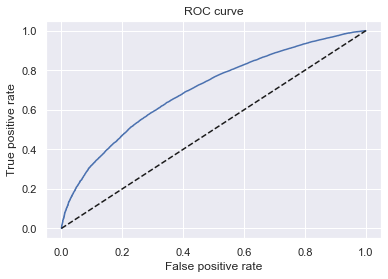

In [130]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [131]:
thresholds

array([1.99296492, 0.99296492, 0.99170648, ..., 0.4363718 , 0.42564753,
       0.32733371])

In [132]:
thresholds.shape

(17132,)

In [133]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']


In [134]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.99296,0.00000,0.00000
1,0.99296,0.00000,0.00001
2,0.99171,0.00000,0.00007
3,0.99167,0.00010,0.00007
4,0.99023,0.00010,0.00042


In [135]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [136]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()


In [137]:
df_cutoffs['Score'][0] = max_score

In [138]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.00000,0.00000,0.00000,850.00000
1,0.99296,0.00000,0.00001,785.00000
2,0.99171,0.00000,0.00007,774.00000
3,0.99167,0.00010,0.00007,773.00000
4,0.99023,0.00010,0.00042,763.00000


In [147]:
df_actual_predicted_prob.tail()

,index,targets_test,y_hat_test_prob,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,234919,1,0.99180,1,93253,83063,10190,0.99996,0.99995,1.00000
93253,239228,1,0.99209,1,93254,83064,10190,0.99997,0.99996,1.00000
93254,251398,1,0.99225,1,93255,83065,10190,0.99998,0.99998,1.00000
93255,262480,1,0.99276,1,93256,83066,10190,0.99999,0.99999,1.00000
93256,242624,1,0.99296,1,93257,83067,10190,1.00000,1.00000,1.00000


In [141]:
 def n_approved(p) :
        return np.where(df_actual_predicted_prob['y_hat_test_prob'] >= p, 1, 0).sum()

In [143]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)

df_cutoffs['N Rejected'] = df_actual_predicted_prob['y_hat_test_prob'].shape[0] - df_cutoffs['N Approved']

df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] /  df_actual_predicted_prob['y_hat_test_prob'].shape[0]

df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']


df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.00000,0.00000,0.00000,850.00000,0,93257,0.00000,1.00000
1,0.99296,0.00000,0.00001,785.00000,1,93256,0.00001,0.99999
2,0.99171,0.00000,0.00007,774.00000,6,93251,0.00006,0.99994
3,0.99167,0.00010,0.00007,773.00000,7,93250,0.00008,0.99992
4,0.99023,0.00010,0.00042,763.00000,36,93221,0.00039,0.99961


In [144]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17127,0.46461,0.99961,0.99996,440.00000,93250,7,0.99992,0.00008
17128,0.43975,0.99990,0.99996,433.00000,93253,4,0.99996,0.00004
17129,0.43637,0.99990,0.99998,432.00000,93254,3,0.99997,0.00003
17130,0.42565,1.00000,0.99998,429.00000,93255,2,0.99998,0.00002
17131,0.32733,1.00000,1.00000,401.00000,93257,0,1.00000,0.00000


In [145]:
df_cutoffs.iloc[5000:6200,]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.90205,0.26310,0.55186,600.00000,48522,44735,0.52030,0.47970
5001,0.90205,0.26320,0.55186,600.00000,48523,44734,0.52031,0.47969
5002,0.90203,0.26320,0.55194,600.00000,48530,44727,0.52039,0.47961
5003,0.90203,0.26330,0.55194,600.00000,48531,44726,0.52040,0.47960
5004,0.90203,0.26330,0.55196,600.00000,48533,44724,0.52042,0.47958
5005,0.90202,0.26340,0.55196,600.00000,48534,44723,0.52043,0.47957
5006,0.90201,0.26340,0.55204,600.00000,48540,44717,0.52050,0.47950
5007,0.90201,0.26349,0.55204,600.00000,48541,44716,0.52051,0.47949
5008,0.90198,0.26349,0.55224,600.00000,48558,44699,0.52069,0.47931
5009,0.90198,0.26359,0.55224,600.00000,48559,44698,0.52070,0.47930


In [149]:
inputs_train_with_ref.to_csv('inputs_train_with_ref.csv')

In [150]:
df_scorecard.to_csv('df_scorecard.csv')